In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def generate_circle():
    y=0.975
    r=np.random.uniform(0.025,0.1)
    x=np.random.uniform(0,1)
    while ((x+r>1) | (x-r<0)):
        x=np.random.uniform(0,1)
        
    return(x,y,r)

In [25]:
def check_vicinity(x,y,r,xList,yList,zList):
    
    if ((y-r)<=0):  #checks if circle touches ground
        #put_it_in(x,y,r,xList,yList,zList)
        return (x,y,r,[],[],[],0) #returns k=0 when circle touches ground
    else:
        
    #if circle does not touch ground
    # defining the box of influence
        x_vi_max=x+r+0.1          #0.1 is the highest radius of disks 
        x_vi_min=x-r-0.1
        y_vi_max=y+r+0.1
        y_vi_min=y-r-0.1
    
        xNear=[]
        yNear=[]
        rNear=[]
        
    # find all centers within vicinity (box of influence)
        for m,n,o in zip(xList,yList,rList):
            if (m<=x_vi_max) & (m>=x_vi_min) & (n<=y_vi_max) & (n>=y_vi_min):
                xNear.append(m)
                yNear.append(n)
                rNear.append(o)
        
        #checks to see if there is anyone in the box
        if (len(rNear)==0):
            check_vicinity(x,y-0.005,r,xList,yList,rList)
            
        return(x,y,r,xNear,yNear,rNear,1) 
    
    

In [6]:
def check_touch(x,y,r,XNear,YNear,RNear):
    touching_xlist=[]
    touching_ylist=[]
    touching_rlist=[]
    t=0
    
    for m,n,o in zip(XNear,YNear,RNear):
        dist=np.sqrt((m-x)**2+(n-y)**2)
        if(dist<=(o+r)):
            t+=1
            touching_xlist.append(m)
            touching_ylist.append(n)
            touching_rlist.append(r)
    
    return (x,y,r,t,touching_xlist,touching_ylist,touching_rlist)
   
    
    

In [7]:
def touch_condition(x,y,r,touching_xlist,touching_ylist,touching_rlist):
    #print(len(touching_xlist), x,y)
    left_t=right_t=0
    # checks where is it touching
    for m,n,o in zip(touching_xlist,touching_ylist,touching_rlist):
        if (m>x):
            right_t+=1
        else:
            left_t+=1
    
    if (right_t>0 & left_t>0):
        return('stay')   #if touching on both sides it stays, else rolls down
           
    elif (right_t>0):
        return('right')
    elif (left_t>0):
        return('left')
                

In [21]:
def rolldown(x,y,r,touching_xlist,touching_ylist,touching_rlist,where):
    
    rolly_y = min(touching_ylist)
    index = touching_ylist.index(rolly_y)
    rolly_x=touching_xlist[index-1]
    rolly_r=touching_rlist[index-1]
    
    contact_angle= math.atan((y-rolly_y)/(x-rolly_x))

    angle=(math.atan((y-rolly_y)/(x-rolly_x)))+math.radians(90) # rolls down perpe
    #print (angle)
    new_y=y-(0.005*math.sin(angle))
    if (where=='right'):
        new_x=x-(0.005*math.cos(angle))
    else:
        new_x=x+(0.005*math.cos(angle))
    
    return(new_x,new_y,r)
    

#print()
    
    

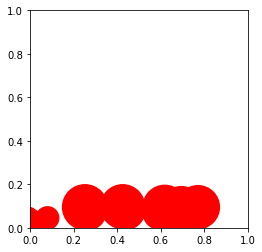

In [27]:
#main function_ish
xList=[]
yList=[]
rList=[]
Area=0

while (Area<=(0.30-np.pi*0.1**2)):
    circle_can_move=True
    x,y,r=generate_circle()
    while (circle_can_move==True):
        a,b,c,xl,yl,rl,k=check_vicinity(x,y,r,xList,yList,rList)
        if (k==0):
            xList.append(x)
            yList.append(y)
            rList.append(r)
            Area+=np.pi*r**2
            circle_can_move=False

        else:
            #i,j,k,xt,yt,rt,wheret=check_touch(a,b,c,xl,yl,rl)
            x,y,r,touch,x_tList,y_tList,r_tList=check_touch(a,b,c,xl,yl,rl)
            if (touch==0):
                y=y-0.005
                #check_vicinity (x,y,r,xList,yList,rList) # falling
            else:
                where = touch_condition(x,y,r,x_tList,y_tList,r_tList)
                if (where=='stay'):
                    xList.append(x)
                    yList.append(y)
                    rList.append(r)
                    Area+=np.pi*r**2
                    circle_can_move=False
                else:
                    x,y,r= rolldown(x,y,r,x_tList,y_tList,r_tList,where)

#input('asdfasd')                   
#print (Area)
fig, ax = plt.subplots()
#ax.axis('equal')
ax.set_aspect(1)
ax.set(xlim=(0, 1), ylim = (0, 1))
for i in range(len(xList)):
    circle1 = plt.Circle((xList[i], yList[i]), rList[i], color = 'r',linewidth=3)
    ax.add_artist(circle1)
plt.show()
 
 


# *********** Till here***********
## scrap below....don't look

AttributeError: module 'matplotlib.pyplot' has no attribute 'circle'

In [37]:
def put_it_in(x,y,r,xList,yList,rList):
    xList.append(x)
    yList.append(y)
    rList.append(r)
    Area+=np.pi*r**2
    #print (Area)
    #note_it(XList,YList,RList,Area)


In [83]:
#initials
x_min=y_min=0;x_max=y_max=1
r=0.05
init_pos_i=0.05
init_pos_j=np.random.uniform(0.05,0.95)
Area=np.pi*


In [84]:
def generate_centers():
    pos_i=np.random.uniform(0.05,0.95)
    pos_j=np.random.uniform(0.05,0.95)
    
    for m,n in zip(center_exist_x,center_exist_y):
        if (pos_i==m) & (pos_j==n):
            generate_centers()
    print(pos_i,pos_j)
    return(pos_i,pos_j)

In [85]:
i,j=generate_centers()

0.6877132928759213 0.9334674478334377


In [80]:
a=check_avail(i,j,center_exist_x,center_exist_y)
if (a==True):
    go_lower(i,j,center_exist_x,center_exist_y)

In [236]:

def check_avail(i,j,center_exist_x,center_exist_y):
    ok=True
    if(Area>55):
        num=center_exist_x.size()+1
        print("done with", num, "number of circles")
        return False
    
    else:
        print("checking for position")
        z=check_space(i,j,center_exist_x,center_exist_y)
        if (z==True):
            print("checking to go lower")
        
        
       
            

In [ ]:
def check_space(i,j,center_exist_x,center_exist_y):
    ok=False
    while(ok==False):
        for m,n in zip(center_exist_x,center_exist_y):
                d=np.sqrt((n-i)**2+(m-j)**2)
                if (d/2<0.05):
                    i,j=generate_centers()
                else:
                    ok=True
        
    check_lower(i,j,center_exist_x,center_exist_y)
    return (ok)
    

In [87]:
def check_lower(i,j,center_exist_x,center_exist_y):
    
    while(j>=0.05) & (check_avail(i,j,center_exist_x,center_exist_y)==True):
        j=j-0.01
    if (j==0.05):
        put_it_in(i,j)
    else:
        roll_down(i,j,center_exist_x,center_exist_y)
    
    

In [ ]:
def roll_down(i,j,center_exist_x,center_exist_y):
    
min_value = min(a_list)
Find the minimum value of `a_list`


min_index = a_list.index(min_value)
Find the index of the minimum value

print(min_index)
    

In [45]:
def put_it_in(i,j):
    center_exist_x=center_exist_x.append(i)
    center_exist_y=center_exist_y.append(j)
    Area=Area+1
    print (Area)


In [50]:
generate_centers()

0.4248002715686958 0.6491174798150742


(0.4248002715686958, 0.6491174798150742)

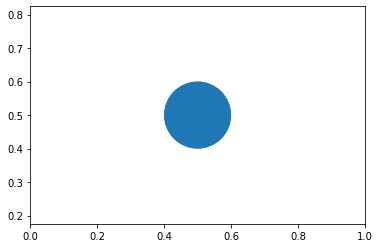

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.axis('equal')
ax.set(xlim=(0, 1), ylim = (0, 1))

a_circle = plt.Circle((0.5, 0.5), 0.1)
ax.add_artist(a_circle)
a_circle = plt.Circle((0.5, 0.5), 0.1)
ax.add_artist(a_circle)

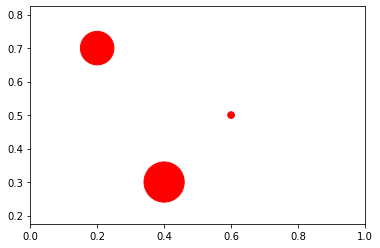

In [70]:
#plotting different circles in a box
xList=[0.2,0.4,0.6]
yList=[0.7,0.3,0.5]
rList=[0.05,0.06,0.01]
fig, ax = plt.subplots()
ax.axis('equal')
ax.set(xlim=(0, 1), ylim = (0, 1))
for i in range(len(xList)):
    circle1 = plt.Circle((xList[i], yList[i]), rList[i], color = 'r')
    ax.add_artist(circle1)
plt.show()

In [239]:
x=[]

print (len(x))

0


In [18]:
generate_circle.x()

AttributeError: 'function' object has no attribute 'x'